In [33]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler

sys.path.append(os.path.abspath('src'))
from src import * 



 AVG orthogonality=  0.1668097603454988
 Final K =  5

K: 5
 Cluster: 0   71  
 Cluster: 1   142  
 Cluster: 2   143  
 Cluster: 3   72  
 Cluster: 4   72  

Silhouette Score: 0.71
Calinski-Harabasz Index: 2893.30
Davies-Bouldin Score: 0.37


Text(0.5, 1.0, 'Orthogonality-based Clustering')

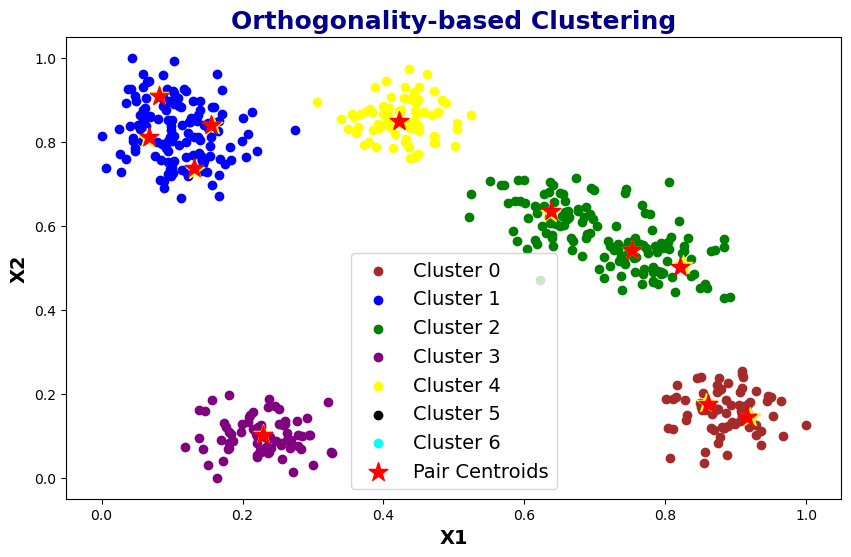

In [88]:
# TESTING BLOBS/MOONS dataset

n = 7
X, y = make_blobs(n_samples= 500 , n_features= 2, centers = n,  random_state=42)

#X, y = make_moons(n_samples=300, noise = 0.05)


# Normalize data to range [0,1]
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

#initialize theta: theta is the orthogonality threshold 
theta = 0.15
#theta= 0.35 #for Moons dataset

# Run ortho clustering algorithm
K, centroids, y_preds = run_OrthoClustering(X_norm, theta)
print(f"\nK: {K}")
#print(f"final clusters: {y_preds}")

"""'y_pred' contains the values index cluster for every training example. 
Let's add it to original dataset for better understanding."""

# Adding the new column at the end 
X_pred = np.insert(X_norm, X_norm.shape[1], y_preds, axis=1)

# Count occurrences of each value
unique_values, counts = np.unique(y_preds, return_counts=True)
 
# Display the results
for value, count in zip(unique_values, counts):
    print(f" Cluster: {value}   {count}  ")
 
#print(X_pred[:10])

# Compute Silhouette Score
sil_score = silhouette_score(X, y_preds)
print(f"\nSilhouette Score: {sil_score:.2f}")

# Compute Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X, y_preds)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")

dav_score = davies_bouldin_score(X, y_preds)
print(f"Davies-Bouldin Score: {dav_score:.2f}")

"""## Visualization <a id ="17"></a>
Let's plot the cluster with different colors to visualize, how Ortho-Clustering algorithm has grouped the data.
"""
plt.figure(figsize=(10,6))

plt.scatter(X_pred[y_preds == 0, 0], X_pred[y_preds == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X_pred[y_preds == 1, 0], X_pred[y_preds == 1, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(X_pred[y_preds == 2, 0], X_pred[y_preds == 2, 1], c = 'green', label = 'Cluster 2')
plt.scatter(X_pred[y_preds == 3, 0], X_pred[y_preds == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X_pred[y_preds == 4, 0], X_pred[y_preds == 4, 1], c = 'yellow', label = 'Cluster 4')
plt.scatter(X_pred[y_preds == 5, 0], X_pred[y_preds == 5, 1], c = 'black', label = 'Cluster 5')
plt.scatter(X_pred[y_preds == 6, 0], X_pred[y_preds == 6, 1], c = 'cyan', label = 'Cluster 6')

plt.scatter(centroids[0][:,0], centroids[0][:, 1],s = 200,  c = 'red', label = 'Pair Centroids', marker='*')

# Display pair centroids
for a, b in centroids:
    plt.scatter(a[0], a[1], c='yellow', s=200, marker='*')
    plt.scatter(b[0], b[1], c='red', s=200, marker='*')
  
plt.xlabel('X1', fontsize=14, fontweight='bold')
plt.ylabel('X2', fontsize=14, fontweight='bold')
plt.legend(fontsize=14)
plt.title('Orthogonality-based Clustering', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'darkblue'})


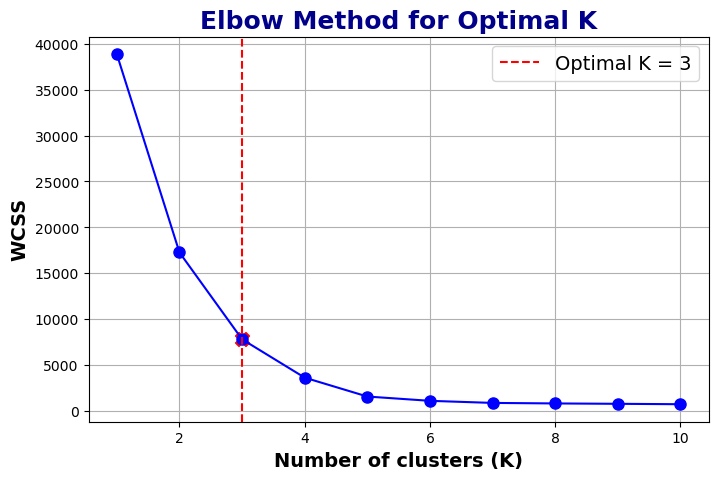

In [90]:
"""
To test k-means, we apply the Elbow method to fix the optimal k
"""

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Calculate WCSS for a range of K values
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Choose optimal K manually or using the "elbow"
optimal_k = 3  # example; can be found by eye or programmatically

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)', fontsize=14, fontweight='bold')
plt.ylabel('WCSS', fontsize=14, fontweight='bold')
plt.title('Elbow Method for Optimal K',fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'darkblue'})

# Highlight optimal K
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.scatter(optimal_k, wcss[optimal_k - 1], s=100, c='red', marker='X')
plt.legend(fontsize=14)
plt.grid(True)
plt.show()



Silhouette Score: 0.65
Calinski-Harabasz Index: 986.86
Davies-Bouldin Score: 0.50


Text(0.5, 1.0, 'K-means Clustering with elbow-K')

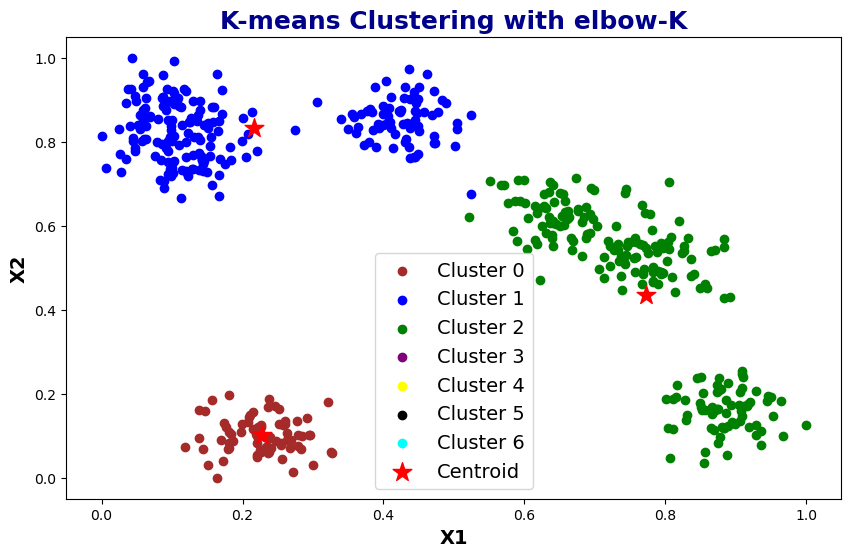

In [92]:
"""
To test k-means, we first have to fix K, obtained using the Elbow method OR predicted by ortho-clustering aproach
"""
K= 3
# Step 2: Perform clustering using KMeans
kmeans = KMeans (n_clusters = K, random_state=42)

# Compute k-means clustering
kmeans.fit(X_norm)

# Compute cluster centers and predict cluster index for each sample.
y_preds = kmeans.predict(X_norm)

# Adding the new column at the end (index 2)
X_pred = np.insert(X_norm, X_norm.shape[1], y_preds, axis=1)

# Count occurrences of each value
unique_values, counts = np.unique(y_preds, return_counts=True)

# Compute Silhouette Score
sil_score = silhouette_score(X, y_preds)
print(f"\nSilhouette Score: {sil_score:.2f}")

# Compute Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X, y_preds)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")

dav_score = davies_bouldin_score(X, y_preds)
print(f"Davies-Bouldin Score: {dav_score:.2f}")

plt.figure(figsize=(10,6))

plt.scatter(X_pred[y_preds == 0, 0], X_pred[y_preds == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X_pred[y_preds == 1, 0], X_pred[y_preds == 1, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(X_pred[y_preds == 2, 0], X_pred[y_preds == 2, 1], c = 'green', label = 'Cluster 2')
plt.scatter(X_pred[y_preds == 3, 0], X_pred[y_preds == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X_pred[y_preds == 4, 0], X_pred[y_preds == 4, 1], c = 'yellow', label = 'Cluster 4')
plt.scatter(X_pred[y_preds == 5, 0], X_pred[y_preds == 5, 1], c = 'black', label = 'Cluster 5')
plt.scatter(X_pred[y_preds == 6, 0], X_pred[y_preds == 6, 1], c = 'cyan', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 200, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('X1', fontsize=14, fontweight='bold')
plt.ylabel('X2', fontsize=14, fontweight='bold')
plt.legend(fontsize=14) 

#plt.title('K-means Clustering with ortho-K',  fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': 'darkblue'})
plt.title('K-means Clustering with elbow-K', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'darkblue'})


************************* RUNNING IRIS + ORTHO-CLUSTERING  **********************************

 AVG orthogonality=  0.16876929337599944
 Final K =  3
 Cluster: 0   50  
 Cluster: 1   49  
 Cluster: 2   51  

Ortho ARI Score: 0.90


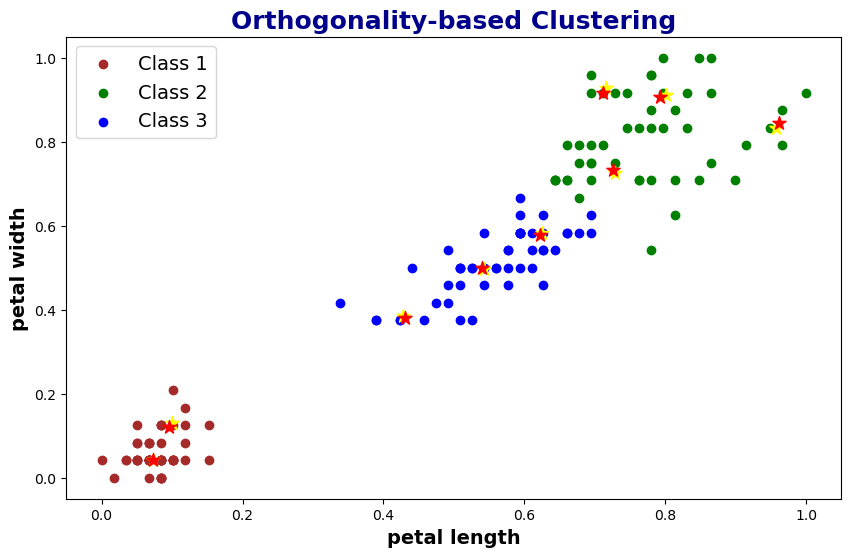

In [43]:
# TESTING  REAL DATASET: IRIS + Orth_Clustring
folder_real_data = "realDatasets/"
data_filename = "data.csv"
f1= folder_real_data + "1-iris/" + data_filename
f2 = folder_real_data + "2-mall/" + data_filename

all_files = [
    f1,
    f2,
]
all_files = [f1]

#clustering parameter
theta = 0.2

for dataset in all_files:
    print("************************* RUNNING IRIS + ORTHO-CLUSTERING  **********************************")
    data, X_all, y, dimension, initial_size = load_supervised_dataset(dataset)
    row_number = data.shape[0]
    X = X_all[:, [2,3]] 
    #gets the truth label of each instance
    labels = y

    # Normalize data to range [0,1]
    scaler = MinMaxScaler()
    X_norm = scaler.fit_transform(X)
  
    # Run ortho_clustering algorithm
    K, centroids,  pred_labels = run_OrthoClustering(X_norm, theta)
    #print(f"\nK: {K}")
    #print(f"final clusters: {pred_labels}")

    """'y_pred' contains the values index cluster for every training example. Let's add it to original dataset for better understanding."""
    # Adding the new column at the end 
    X_pred = np.insert(X_norm, X_norm.shape[1], pred_labels, axis=1)

    # Count occurrences of each value
    unique_values, counts = np.unique(pred_labels, return_counts=True)
   
    # Display the results
    for value, count in zip(unique_values, counts):
        print(f" Cluster: {value}   {count}  ")
   
## Visualization <a id ="17"></a>
#Let's plot the cluster with different colors to visualize, how ortho_Clustering algorithm has grouped the data.

plt.figure(figsize=(10,6))

plt.scatter(X_pred[pred_labels == 0, 0], X_pred[pred_labels == 0, 1], c = 'brown', label = 'Class 1')
plt.scatter(X_pred[pred_labels == 1, 0], X_pred[pred_labels == 1, 1], c = 'green', label = 'Class 2')
plt.scatter(X_pred[pred_labels == 2, 0], X_pred[pred_labels == 2, 1], c = 'blue', label = 'Class 3')

# Display Pair centroids
for a, b in centroids:
    plt.scatter(a[0], a[1], c='yellow', s=100, marker='*')
    plt.scatter(b[0], b[1], c='red', s=100, marker='*')

plt.xlabel('petal length', fontsize=14, fontweight='bold')
plt.ylabel('petal width', fontsize=14, fontweight='bold')
plt.legend(fontsize=14)
plt.title('Orthogonality-based Clustering', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'darkblue'})

ARI = adjusted_rand_score(labels, pred_labels)
print(f"\nOrtho ARI Score: {ARI:.2f}")



C:\Users\test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

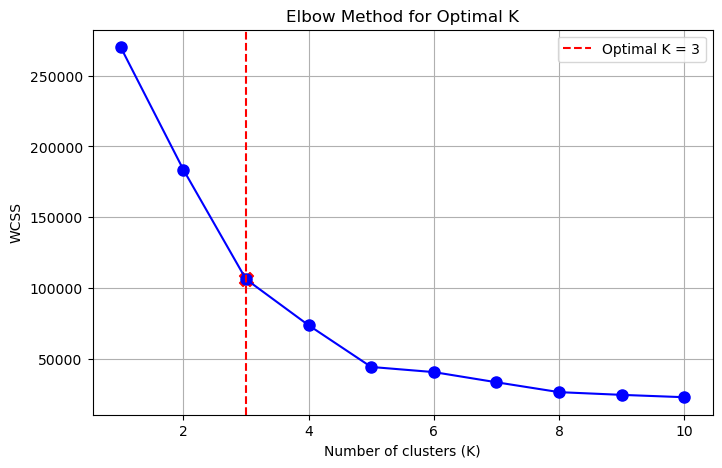

In [77]:
# Running Elbow to fix optimal K
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


# Calculate WCSS for a range of K values
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Choose optimal K manually or using the "elbow"
optimal_k = 3  # example; can be found by eye or programmatically

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')

# Highlight optimal K
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.scatter(optimal_k, wcss[optimal_k - 1], s=100, c='red', marker='X')
plt.legend()
plt.grid(True)
plt.show()

********************* RUNNING IRIS + K-MEANS ********************************

K-means ARI Score: 0.89


C:\Users\test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


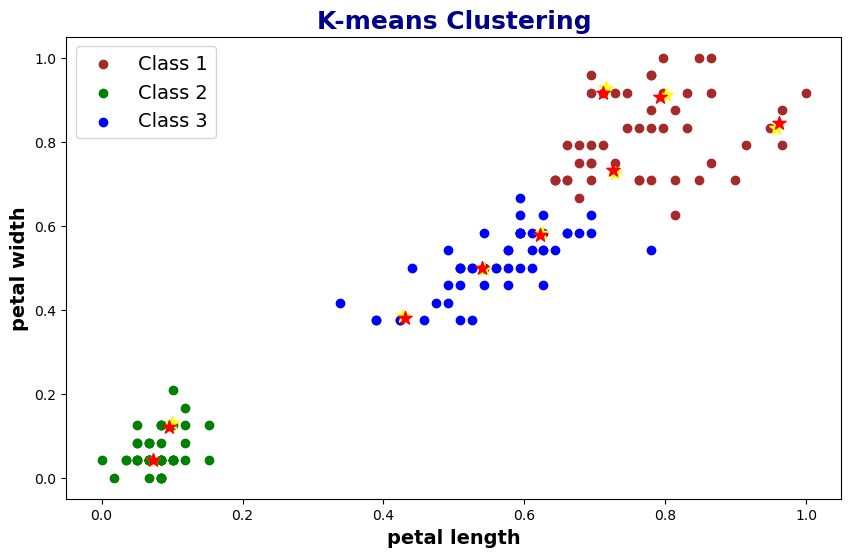

In [49]:
# TESTING  REAL DATASET: IRIS + K-MEANS
from sklearn.cluster import KMeans
K=3

print("********************* RUNNING IRIS + K-MEANS ********************************")
data, X_all, y, dimension, initial_size = load_supervised_dataset(dataset)
row_number = data.shape[0]
X = X_all[:, [2,3]] 
#gets the truth label of each instance
labels = y

# Normalize data to range [0,1]
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
#print(f"X:\n {X_norm[:10]}")


# Step 2: Perform clustering using KMeans
kmeans = KMeans(n_clusters = K, random_state=42)

# Compute k-means clustering
kmeans.fit(X_norm)

# Compute cluster centers and predict cluster index for each sample.
pred_labels = kmeans.predict(X_norm)

# Adding the new column at the end (index 2)
X_pred = np.insert(X_norm, X_norm.shape[1], pred_labels, axis=1)

# Count occurrences of each value
unique_values, counts = np.unique(pred_labels, return_counts=True)

plt.figure(figsize=(10,6))

plt.scatter(X_pred[pred_labels == 0, 0], X_pred[pred_labels == 0, 1], c = 'brown', label = 'Class 1')
plt.scatter(X_pred[pred_labels == 1, 0], X_pred[pred_labels == 1, 1], c = 'green', label = 'Class 2')
plt.scatter(X_pred[pred_labels == 2, 0], X_pred[pred_labels == 2, 1], c = 'blue', label = 'Class 3')

# Display Pair centroids
for a, b in centroids:
    plt.scatter(a[0], a[1], c='yellow', s=100, marker='*')
    plt.scatter(b[0], b[1], c='red', s=100, marker='*')


plt.xlabel('petal length', fontsize=14, fontweight='bold')
plt.ylabel('petal width', fontsize=14, fontweight='bold')
plt.legend(fontsize=14)
plt.title('K-means Clustering', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'darkblue'})
           
ARI = adjusted_rand_score(labels, pred_labels)
print(f"\nK-means ARI Score: {ARI:.2f}")


************************* RUNNING MALL + ORTHO-CLUSTERING  **********************************

 AVG orthogonality=  0.12986972214446166
 Final K =  5

Silhouette Score: 0.56
Calinski-Harabasz Index: 261.15
Davies-Bouldin Score: 0.57


Text(0.5, 1.0, 'Orthogonality-based Clustering')

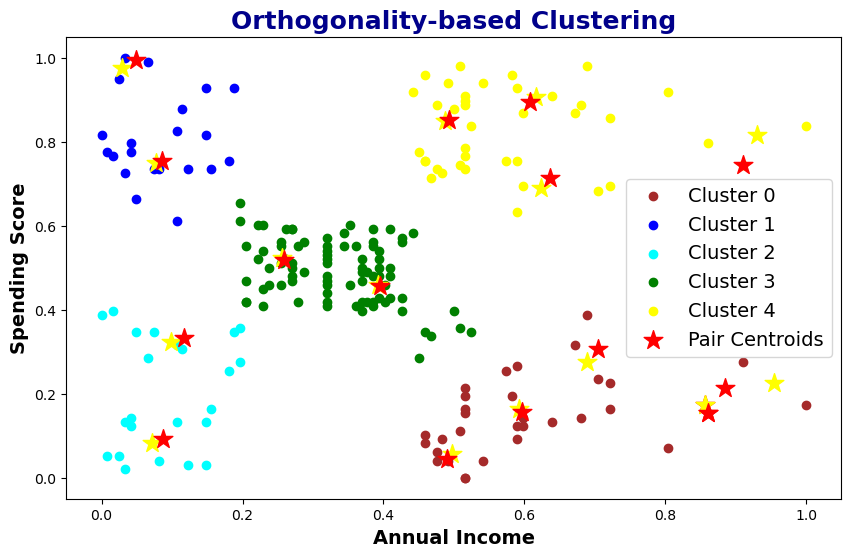

In [75]:

# TESTING  REAL DATASET: MALL + ORTHO-CLUSTERING
folder_real_data = "realDatasets/"
data_filename = "data.csv"
f1= folder_real_data + "1-iris/" + data_filename
f2 = folder_real_data + "2-mall/" + data_filename

all_files = [
    f1,
    f2,
]
all_files = [f2]

#clustering parameter
theta = 0.25

for dataset in all_files:
    print("************************* RUNNING MALL + ORTHO-CLUSTERING  **********************************")
    data, X_all, dimension, initial_size = load_unsupervised_dataset(dataset)
    row_number = data.shape[0]
    X = X_all[:, [3,4]]
    
    # Normalize data to range [0,1]
    scaler = MinMaxScaler()
    X_norm = scaler.fit_transform(X)

    # Run ortho clustering algorithm
    K, centroids, y_preds = run_OrthoClustering(X_norm,theta)

    """'y_pred' contains the values index cluster for every training example. Let's add it to original dataset for better understanding."""
    # Adding the new column at the end 
    X_pred = np.insert(X_norm, X_norm.shape[1], y_preds, axis=1)
        
    # Count occurrences of each value
    unique_values, counts = np.unique(y_preds, return_counts=True)

sil_score = silhouette_score(X_norm, y_preds)
print(f"\nSilhouette Score: {sil_score:.2f}")

ch_score = calinski_harabasz_score(X_norm, y_preds)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")

dav_score = davies_bouldin_score(X_norm, y_preds)
print(f"Davies-Bouldin Score: {dav_score:.2f}")

## Visualization <a id ="17"></a>
#Let's plot the cluster with different colors to visualize, how OrthoClustering algorithm has grouped the data.
 

plt.figure(figsize=(10,6))

plt.scatter(X_pred[y_preds == 0, 0], X_pred[y_preds == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X_pred[y_preds == 1, 0], X_pred[y_preds == 1, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(X_pred[y_preds == 2, 0], X_pred[y_preds == 2, 1], c = 'cyan', label = 'Cluster 2')
plt.scatter(X_pred[y_preds == 3, 0], X_pred[y_preds == 3, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X_pred[y_preds == 4, 0], X_pred[y_preds == 4, 1], c = 'yellow', label = 'Cluster 4')

plt.scatter(centroids[0][:,0], centroids[0][:, 1],s = 200,  c = 'red', label = 'Pair Centroids', marker='*')

# Affichage des paires de centroïdes
for a, b in centroids:
    # Affiche les deux points en jaune, rouge
    plt.scatter(a[0], a[1], c='yellow', s=200, marker='*')
    plt.scatter(b[0], b[1], c='red', s=200, marker='*')


plt.xlabel('Annual Income', fontsize=14, fontweight='bold')
plt.ylabel('Spending Score', fontsize=14, fontweight='bold')
plt.legend(fontsize=14)
plt.title('Orthogonality-based Clustering', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'darkblue'})


C:\Users\test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

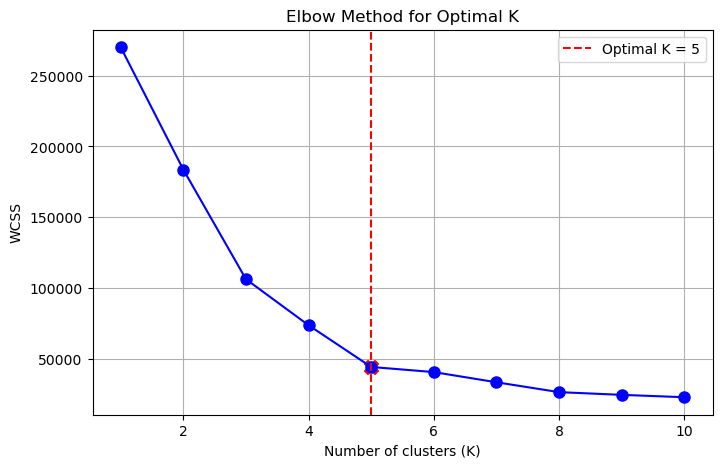

In [53]:
# Running Elbow to fix optimal K
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


# Calculate WCSS for a range of K values
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Choose optimal K manually or using the "elbow"
optimal_k = 5  # example; can be found by eye or programmatically

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')

# Highlight optimal K
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.scatter(optimal_k, wcss[optimal_k - 1], s=100, c='red', marker='X')
plt.legend()
plt.grid(True)
plt.show()


 K-means Silhouette Score: 0.56
K-means Calinski-Harabasz Index: 264.55
 K-meansDavies-Bouldin Score: 0.56


C:\Users\test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-means Clustering')

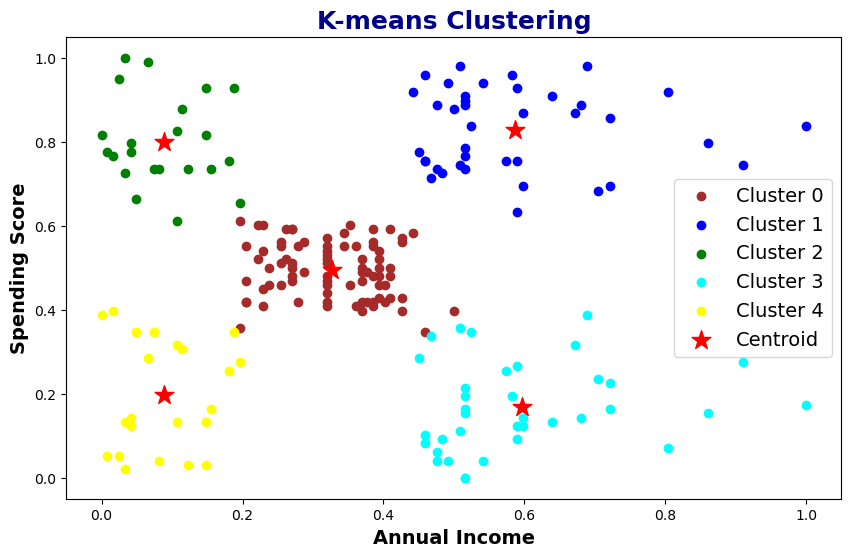

In [71]:

# TESTING  REAL DATASET: MALL + K-MEANS
K=5

# Step 2: Perform clustering using KMeans
kmeans = KMeans(n_clusters = K, random_state=42)

# Compute k-means clustering
kmeans.fit(X_norm)

# Compute cluster centers and predict cluster index for each sample.
y_preds = kmeans.predict(X_norm)

# Adding the new column at the end (index 2)
X_pred = np.insert(X_norm, X_norm.shape[1], y_preds, axis=1)

# Count occurrences of each value
unique_values, counts = np.unique(y_preds, return_counts=True)

sil_score = silhouette_score(X_norm, y_preds)
print(f"\n K-means Silhouette Score: {sil_score:.2f}")

# Step 4: Compute Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_norm, y_preds)
print(f"K-means Calinski-Harabasz Index: {ch_score:.2f}")

dav_score = davies_bouldin_score(X_norm, y_preds)
print(f" K-meansDavies-Bouldin Score: {dav_score:.2f}")

plt.figure(figsize=(10,6))

plt.scatter(X_pred[y_preds == 0, 0], X_pred[y_preds == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X_pred[y_preds == 1, 0], X_pred[y_preds == 1, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(X_pred[y_preds == 2, 0], X_pred[y_preds == 2, 1], c = 'green', label = 'Cluster 2')
plt.scatter(X_pred[y_preds == 3, 0], X_pred[y_preds == 3, 1], c = 'cyan', label = 'Cluster 3')
plt.scatter(X_pred[y_preds == 4, 0], X_pred[y_preds == 4, 1], c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 200, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income', fontsize=14, fontweight='bold')
plt.ylabel('Spending Score', fontsize=14, fontweight='bold')
plt.legend(fontsize=14)
plt.title('K-means Clustering', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'darkblue'})

